In [116]:
%load_ext autoreload
%autoreload 2
from research.data.utils import GenerationType, generate_model


parameters = {"start_capital": 1.0, "delta": 0.025, "alpha": 0.33, "beta": 0.95}    


df_dynare, params = generate_model(
    "Ramsey", parameters, periods=50, type=GenerationType.DYNARE
)
df_gymnasium, params = generate_model(
    "Ramsey", parameters, periods=50, type=GenerationType.GYMNASIUM
)
df_gymnasium_with_trajectory, params = generate_model(
    "Ramsey", parameters, periods=50, type=GenerationType.GYMNASIUM, trajectory=df_dynare
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running model: /home/jovyan/marl-macro-modeling/dynare/docker/dynare_models/Ramsey.mod (attempt 1)
2025-06-06 00:03:31.245 | INFO     | lib.dynare_traj2rl_transitions:run_model:134 - Running command: octave --eval "
                addpath /home/jovyan/homebrew/opt/dynare/lib/dynare/matlab; 
                cd /home/jovyan/marl-macro-modeling/dynare/docker/dynare_models; 
                dynare Ramsey.mod -Dperiods=50 -Dstart_capital=1.0 -Ddelta=0.025 -Dalpha=0.33 -Dbeta=0.95; 
                oo_simul = oo_.endo_simul'; 
                var_names = M_.endo_names_tex;

                fid = fopen('/tmp/tmpy6_j2zn6/Ramsey.csv', 'w');
                fprintf(fid, '%s,', var_names{1:end-1});
                fprintf(fid, '%s\n', var_names{end});
                fclose(fid);

                dlmwrite('/tmp/tmpy6_j2zn6/Ramsey.csv', oo_simul, '-append');
                "
2025-06-06 00:03:31.246 | INFO    

In [117]:
df_gymnasium_with_trajectory.iloc[:25]

,Consumption,Capital,Output,Investment
0,0.000000,1.000000,0.000000,0.000000
1,0.571010,1.403990,1.000000,0.428990
2,0.671507,1.815869,1.118485,0.446978
3,0.763140,2.224913,1.217581,0.454441
4,0.846863,2.624435,1.302007,0.455144
5,0.923497,3.010261,1.374934,0.451437
6,0.993748,3.379854,1.438598,0.444850
7,1.058228,3.731769,1.494639,0.436411
8,1.117472,4.065303,1.544301,0.426828
9,1.171952,4.380267,1.588549,0.416597


In [111]:
df_dynare.iloc[:25]

,Consumption,Capital,Output,Investment
0,0.000000,1.000000,0.000000,0.000000
1,0.571010,1.403990,1.000000,0.428990
2,0.671507,1.815869,1.118485,0.446978
3,0.763140,2.224913,1.217581,0.454441
4,0.846863,2.624435,1.302007,0.455144
5,0.923497,3.010261,1.374934,0.451437
6,0.993748,3.379854,1.438598,0.444850
7,1.058228,3.731769,1.494639,0.436411
8,1.117472,4.065303,1.544301,0.426828
9,1.171952,4.380267,1.588549,0.416597


In [112]:
df_gymnasium.iloc[:25]

,Consumption,Capital,Output,Investment
0,0.000000,1.000000,0.000000,0.000000
1,0.570998,1.404002,1.000000,0.429002
2,0.671492,1.815899,1.118488,0.446996
3,0.763121,2.224967,1.217588,0.454466
4,0.846840,2.624521,1.302017,0.455178
5,0.923469,3.010388,1.374949,0.451480
6,0.993714,3.380032,1.438618,0.444904
7,1.058187,3.732009,1.494665,0.436478
8,1.117423,4.065619,1.544333,0.426910
9,1.171893,4.380674,1.588590,0.416696


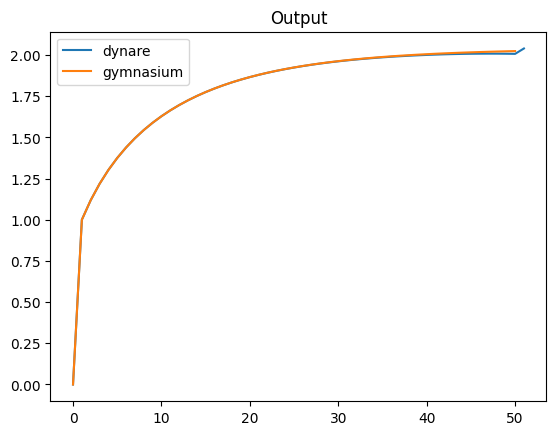

In [75]:
import matplotlib.pyplot as plt
plt.title("Output")
plt.plot(df_dynare.Output, label="dynare")
plt.plot(df_gymnasium.Output, label="gymnasium")
plt.legend()


In [10]:
from pathlib import Path
import pandas as pd

path = Path("marl_experiments/d22da4e8c815744615a872eded3f45a4/dataset/train/metadata.json")
import json

names = set()
for item in json.load(open(path)):
    names.add(item['env_name'].rsplit('_', 1)[0])

print(names)

m = {}
for i, name in enumerate(names):
    m[name] = i

print(m)




{'Born_Pfeifer_2018_MP', 'Aguiar_Gopinath_2007', 'RBC_news_shock_model', 'Hansen_1985', 'GarciaCicco_et_al_2010', 'Caldara_et_al_2012', 'RBC_capitalstock_shock', 'SGU_2003', 'Gali_2008_chapter_2', 'Collard_2001_example1', 'McCandless_2008_Chapter_13', 'FV_et_al_2007_ABCD', 'RBC_baseline', 'RBC_state_dependent_GIRF', 'SGU_2004', 'Faia_2008'}
{'Born_Pfeifer_2018_MP': 0, 'Aguiar_Gopinath_2007': 1, 'RBC_news_shock_model': 2, 'Hansen_1985': 3, 'GarciaCicco_et_al_2010': 4, 'Caldara_et_al_2012': 5, 'RBC_capitalstock_shock': 6, 'SGU_2003': 7, 'Gali_2008_chapter_2': 8, 'Collard_2001_example1': 9, 'McCandless_2008_Chapter_13': 10, 'FV_et_al_2007_ABCD': 11, 'RBC_baseline': 12, 'RBC_state_dependent_GIRF': 13, 'SGU_2004': 14, 'Faia_2008': 15}


In [2]:
path.exists()

True

In [5]:
train = path / "train" / "1_05fd567f.parquet"
train.exists()

data = pd.read_parquet(train)

data.head()

,state,action,reward,done,truncated,info
0,"[1.390663171906107e-309, 1.39065557868902e-309...",[-0.579692113087618],-0.146101,False,False,{'dummy': 'dummy'}
1,"[-0.1461008655432191, 0.4913128567444978, 1.53...",[0.21013859587716105],-0.045819,False,False,{'dummy': 'dummy'}
2,"[-0.1002819832934168, -0.5765538318777899, 1.1...",[0.07032619011234548],-0.052904,False,False,{'dummy': 'dummy'}
3,"[-0.0473778453714822, -1.1544559049194352, 0.6...",[0.339345889879557],-0.082313,False,False,{'dummy': 'dummy'}
4,"[0.0349346799402597, -0.7554839052014466, -0.0...",[0.026007752991453303],-0.056145,False,False,{'dummy': 'dummy'}


In [11]:
%load_ext autoreload
%autoreload 2
from research.data.utils import GenerationType, generate_model


parameters = {"beta": 0.96, "start_capital": 0.1}    


df_dynare, params = generate_model(
    "GarciaCicco_et_al_2010", parameters, periods=100, type=GenerationType.DYNARE
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running model: /home/jovyan/marl-macro-modeling/dynare/docker/dynare_models/GarciaCicco_et_al_2010.mod (attempt 1)
2025-06-07 01:10:39.683 | INFO     | lib.dynare_traj2rl_transitions:run_model:172 - Running command: octave --eval "
                addpath /home/jovyan/homebrew/opt/dynare/lib/dynare/matlab; 
                cd /home/jovyan/marl-macro-modeling/dynare/docker/dynare_models; 
                dynare GarciaCicco_et_al_2010.mod -Dperiods=100 -Dbeta=0.96 -Dstart_capital=0.1; 
                oo_simul = oo_.endo_simul'; 
                var_names = M_.endo_names_tex;
                param_names = M_.param_names;
                param_values = M_.params;

                fid = fopen('/tmp/tmprcxquc5o/GarciaCicco_et_al_2010.csv', 'w');
                fprintf(fid, '%s,', var_names{1:end-1});
                fprintf(fid, '%s\n', var_names{end});
                fclose(fid);

                dlmw

In [12]:
params

{'beta': 0.96,
 'gamma': 2.0,
 'delta': 0.125509,
 'alpha': 0.32,
 'psi': 2.867166,
 'omega': 1.6,
 'theta': 2.24,
 'phi': 4.810804,
 'dbar': 0.007,
 'gbar': 1.009891,
 'rho_a': 0.864572,
 'rho_g': 0.323028,
 'rho_nu': 0.850329,
 'rho_mu': 0.906803,
 'rho_s': 0.205035,
 's_share': 0.1,
 'S': 0.027461,
 'k_ss': 0.467706,
 'c_ss': 0.183473}

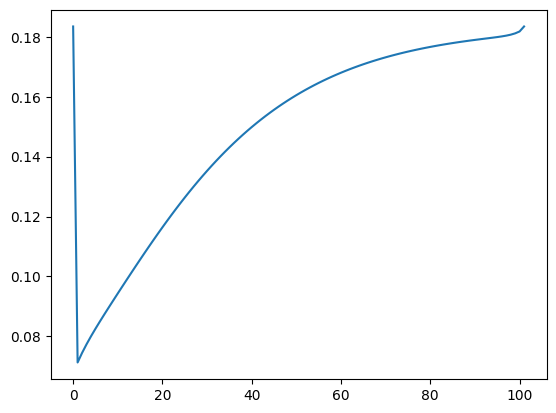

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_dynare.Consumption)